### 时长

In [2]:
start_date, end_date = '2020-01-01', '2020-12-31'

### 区域经纬度


In [3]:
latitude = [25, 25.5]  # [latitude south, latitude north]
longitude = [68, 68.5]  # [longitude west, longitude east]
single_location = [68, 25] #经纬度
location1 = (25, 68)

### 目标文件名称2

In [4]:
target_file = 'Pakistan.nc'
solar1 = "Solar_Pakistan.xlsx"
wind1 = "Wind_Pakistan.xlsx"

In [5]:
from feedinlib import era5
import pandas as pd

c:\Users\LINK4\Anaconda3\envs\CDS\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


#### 计算

In [6]:
variable = "feedinlib"# get pvlib data for specified area
ds_berlin = era5.get_era5_data_from_datespan_and_position(
    variable=variable,
    start_date=start_date, end_date=end_date, 
    latitude=latitude, longitude=longitude,
    target_file=target_file)
# 这里可能要排队很久There may be a long queue here

2022-06-17 17:25:06,878 INFO Welcome to the CDS
2022-06-17 17:25:06,879 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-06-17 17:25:07,636 INFO Request is completed
2022-06-17 17:25:07,638 INFO Downloading request for 9 variables to Pakistan.nc
2022-06-17 17:25:07,640 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data7/adaptor.mars.internal-1655435151.3595617-16606-1-f4f7878c-cd2e-429b-800a-3ad394c843a6.nc to Pakistan.nc (1.4M)
2022-06-17 17:25:13,758 INFO Download rate 233.3K/s 
c:\Users\LINK4\Anaconda3\envs\CDS\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Could not load the ecCodes library!
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


### 目标文件名称2

In [7]:
era5_netcdf_filename = target_file

### 单个区域的坐标

In [8]:
# for single location (as list of longitude and latitude)

pvlib_df = era5.weather_df_from_era5(
    era5_netcdf_filename=era5_netcdf_filename,
    lib='pvlib',
    area=single_location) # single_location = [68, 25] #经纬度
pvlib_df.head()

,wind_speed,temp_air,ghi,dhi
time,,,,
2019-12-31 23:30:00+00:00,6.597351,7.339355,0.000035,0.000035
2020-01-01 00:30:00+00:00,6.745894,7.111633,0.000035,0.000035
2020-01-01 01:30:00+00:00,6.802092,7.081573,0.000035,0.000035
2020-01-01 02:30:00+00:00,6.865180,7.238403,30.934618,22.096180
2020-01-01 03:30:00+00:00,7.933881,7.315918,189.161148,92.964935


In [9]:
# for whole region

windpowerlib_df = era5.weather_df_from_era5(
    era5_netcdf_filename=era5_netcdf_filename,
    lib='windpowerlib',
    area=single_location) # single_location = [68, 25] #经纬度
windpowerlib_df.head()

variable                  wind_speed                  pressure temperature  \
height                           10         100            0           2     
time                                                                         
2019-12-31 23:00:00+00:00   6.597351  10.915031  101348.429688  280.489349   
2020-01-01 00:00:00+00:00   6.745894  11.058444  101410.554688  280.261627   
2020-01-01 01:00:00+00:00   6.802092  11.085985  101483.031250  280.231567   
2020-01-01 02:00:00+00:00   6.865180  11.333065  101552.609375  280.388397   
2020-01-01 03:00:00+00:00   7.933881  10.890983  101622.617188  280.465912   

variable                  roughness_length  
height                                 0    
time                                        
2019-12-31 23:00:00+00:00         0.043687  
2020-01-01 00:00:00+00:00         0.043697  
2020-01-01 01:00:00+00:00         0.043702  
2020-01-01 02:00:00+00:00         0.043702  
2020-01-01 03:00:00+00:00         0.043782

### 光电模型参数

In [10]:
import pvlib
pvlib.__version__
# pvlib's version is 0.8.0 

'0.8.0'

In [11]:
from feedinlib import Photovoltaic

c:\Users\LINK4\Anaconda3\envs\CDS\lib\site-packages\pvlib\pvsystem.py:478: pvlibDeprecationWarning: temperature_model_parameters, racking_model, and module_type are not specified. Reverting to deprecated default: SAPM cell temperature model parameters for a glass/glass module in open racking. In v0.9, temperature_model_parameters or a valid combination of racking_model and module_type will be required.
  warnings.warn(


<AxesSubplot:xlabel='time'>

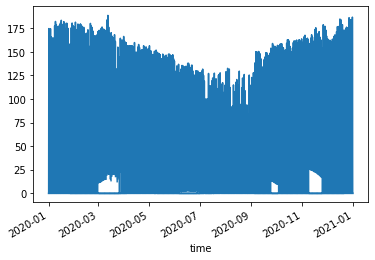

In [12]:
system_data = {
    'module_name': 'Advent_Solar_Ventura_210___2008_', 
    'inverter_name': 'ABB__MICRO_0_25_I_OUTD_US_208__208V_',
    'azimuth': 180,
    'tilt': 30,
    'albedo': 0.2}
pv_system = Photovoltaic(**system_data)
feedin = pv_system.feedin(weather=pvlib_df,location=location1)
feedin.plot()

# 将光电数据保存为excel

In [14]:

df= pd.DataFrame(feedin)
list1= []
for i in df[0]:
    list1.append(i)
df2 = pd.DataFrame(list1)
df2 = df2.fillna(0)
df2.to_excel(solar1)

# 风电模型参数

<AxesSubplot:xlabel='time'>

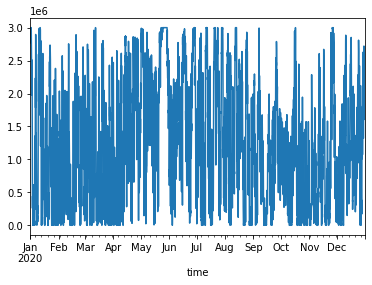

In [15]:
from feedinlib import WindPowerPlant
turbine_data = {
    'turbine_type': 'E-101/3050',
    'hub_height': 135
    }
wind_turbine = WindPowerPlant(**turbine_data)
feedin = wind_turbine.feedin(
    weather=windpowerlib_df)
feedin.plot()

In [16]:
df= pd.DataFrame(feedin)
list1= []
for i in df["feedin_power_plant"]:
    list1.append(i)
df2 = pd.DataFrame(list1)
df2.to_excel(wind1)